#### Setup

In [14]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import seaborn as sns

1) ANOVA is a statistical test that can be used to assess the discriminative power of a
single input variable. Using f_classif from sklearn, identify the input variables with the
worst and best discriminative power. Plot their class-conditional probability density
functions.

The input variables with the worst discriminative power is: BloodPressure and the best is: Glucose


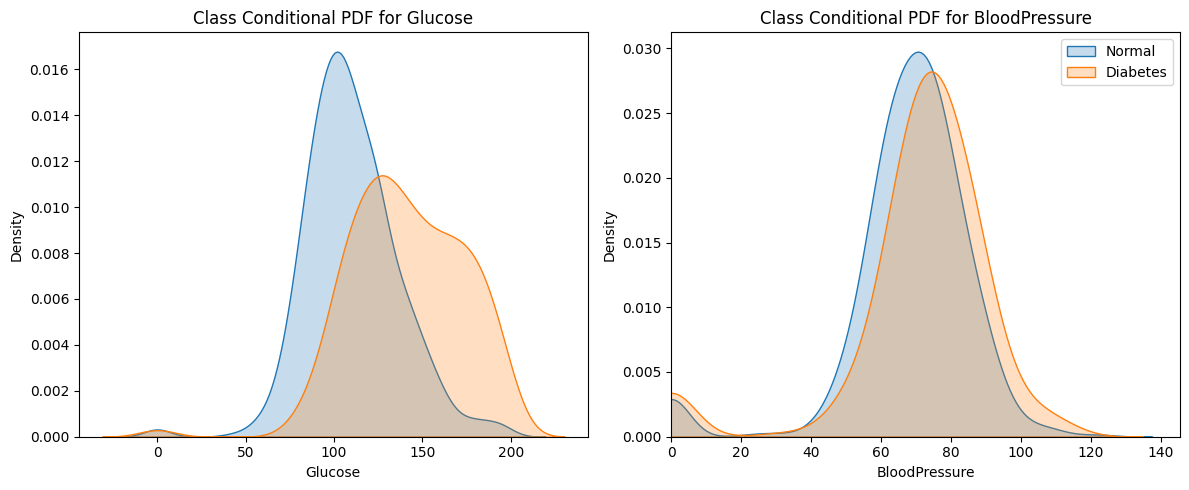

In [15]:
# Load the data
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

df['Outcome'] = df['Outcome'].astype(int)
f_values, p_values = f_classif(X, y)

# Identify the best and worst input variables based on f-values
best = np.argmax(f_values)
worst = np.argmin(f_values)

fig = plt.figure(figsize=(12, 5))

print(f"The input variables with the worst discriminative power is: {X.columns[worst]} and the best is: {X.columns[best]}")

# Best input variable
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['Outcome'] == 0]["Glucose"], label= 'Normal', fill= True)
sns.kdeplot(df[df['Outcome'] == 1]["Glucose"], label= 'Diabetes', fill= True)
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.title('Class Conditional PDF for Glucose')

# Worst input variable
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['Outcome'] == 0]["BloodPressure"], label= 'Normal', fill= True)
sns.kdeplot(df[df['Outcome'] == 1]["BloodPressure"], label= 'Diabetes', fill= True)
plt.xlabel('BloodPressure')
plt.xlim(0,None)
plt.ylabel('Density')
plt.title('Class Conditional PDF for BloodPressure')

plt.tight_layout()
plt.legend()
plt.show()